In [1]:
import pandas as pd
import numpy as np

# Create an empty dataframe
data = pd.DataFrame()

# Create our target variable
data['Gender'] = ['male','male','male','male','female','female','female','female']

# Create our feature variables
data['Height'] = [6,5.92,5.58,5.92,5,5.5,5.42,5.75]
data['Weight'] = [180,190,170,165,100,150,130,150]
data['Foot_Size'] = [12,11,12,10,6,8,7,9]

# View the data
data

,Gender,Height,Weight,Foot_Size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


In [2]:
# Create an empty dataframe
person = pd.DataFrame()

# Create some feature values for this single row
person['Height'] = [6]
person['Weight'] = [130]
person['Foot_Size'] = [8]

# View the data 
person

,Height,Weight,Foot_Size
0,6,130,8


# Calculate Priors

In [3]:
# Number of males
n_male = data['Gender'][data['Gender'] == 'male'].count()

# Number of males
n_female = data['Gender'][data['Gender'] == 'female'].count()

# Total rows
total_ppl = data['Gender'].count()

In [4]:
# Number of males divided by the total rows
P_male = n_male/total_ppl

# Number of females divided by the total rows
P_female = n_female/total_ppl

# Calculate Likelihood

In [5]:
# Group the data by gender and calculate the means of each feature
data_means = data.groupby('Gender').mean()

# View the values
data_means

,Height,Weight,Foot_Size
Gender,,,
female,5.4175,132.50,7.50
male,5.8550,176.25,11.25


In [6]:
# Group the data by gender and calculate the variance of each feature
data_variance = data.groupby('Gender').var()

# View the values
data_variance

,Height,Weight,Foot_Size
Gender,,,
female,0.097225,558.333333,1.666667
male,0.035033,122.916667,0.916667


In [7]:
# Means for male
male_height_mean = data_means['Height'][data_variance.index == 'male'].values[0]
male_weight_mean = data_means['Weight'][data_variance.index == 'male'].values[0]
male_footsize_mean = data_means['Foot_Size'][data_variance.index == 'male'].values[0]

# Variance for male
male_height_variance = data_variance['Height'][data_variance.index == 'male'].values[0]
male_weight_variance = data_variance['Weight'][data_variance.index == 'male'].values[0]
male_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'male'].values[0]

# Means for female
female_height_mean = data_means['Height'][data_variance.index == 'female'].values[0]
female_weight_mean = data_means['Weight'][data_variance.index == 'female'].values[0]
female_footsize_mean = data_means['Foot_Size'][data_variance.index == 'female'].values[0]

# Variance for female
female_height_variance = data_variance['Height'][data_variance.index == 'female'].values[0]
female_weight_variance = data_variance['Weight'][data_variance.index == 'female'].values[0]
female_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'female'].values[0]

In [8]:
# Create a function that calculates p(x | y):
def p_x_given_y(x, mean_y, variance_y):

    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    
    # return p
    return p

In [9]:
# Numerator of the posterior if the unclassified observation is a male
P_male * \
p_x_given_y(person['Height'][0], male_height_mean, male_height_variance) * \
p_x_given_y(person['Weight'][0], male_weight_mean, male_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], male_footsize_mean, male_footsize_variance)

6.197071843878078e-09

In [10]:
# Numerator of the posterior if the unclassified observation is a female
P_female * \
p_x_given_y(person['Height'][0], female_height_mean, female_height_variance) * \
p_x_given_y(person['Weight'][0], female_weight_mean, female_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], female_footsize_mean, female_footsize_variance)

0.0005377909183630018

# FROM SCRATCH

In [43]:
data = pd.DataFrame()

# Create our target variable
data['Gender'] = [1,1,1,1,0,0,0,0]

# Create our feature variables
data['Height'] = [6,5.92,5.58,5.92,5,5.5,5.42,5.75]
data['Weight'] = [180,190,170,165,100,150,130,150]
data['Foot_Size'] = [12,11,12,10,6,8,7,9]

data

,Gender,Height,Weight,Foot_Size
0,1,6.00,180,12
1,1,5.92,190,11
2,1,5.58,170,12
3,1,5.92,165,10
4,0,5.00,100,6
5,0,5.50,150,8
6,0,5.42,130,7
7,0,5.75,150,9


In [29]:
X = data.drop(['Gender'],axis=1) 
y=data.Gender

  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)


In [30]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, gnb.predict(X)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



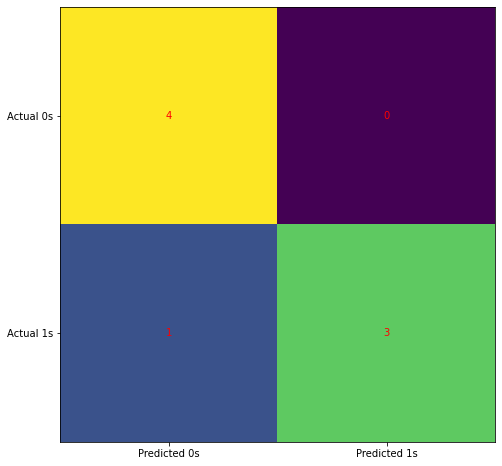

In [33]:
cm = confusion_matrix(y, gnb.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [42]:
# Create our target variable
data1 = pd.DataFrame()
# Create our feature variables
data1['Height'] = [6]
data1['Weight'] = [130]
data1['Foot_Size'] = [8]
y_pred = gnb.predict(data1)
if y_pred==0:
    print ("female")
else:
    print ("male")

female
